In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -Uq fastai gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.1 MB/s

In [ ]:
from fastai.vision.all import load_learner
import gradio as gr
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/Types of balls

/content/drive/MyDrive/MasterCourse/Types of balls


In [ ]:
version = 5
img_path = 'test_images'
model_path = f'models/ball-classifier-v5.pkl'

In [ ]:
model = load_learner('models/ball-classifier-v5.pkl')

In [ ]:
dls = torch.load(f"ball_dataloader_v5.pkl")
print(dls.train.vocab)

['Baseball', 'Basketball', 'Billiards', 'Bowling', 'Cricket', 'Football', 'Golf', 'Rugby', 'Tennis', 'Volleyball']


In [ ]:
ball_labels = [
    'Baseball',
    'Basketball',
    'Billiards',
    'Bowling',
    'Cricket',
    'Football',
    'Golf',
    'Rugby',
    'Tennis',
    'Volleyball'
]

In [ ]:
def recognize_image(image):
    pred, idx, probs = model.predict(image)
    return dict(zip(ball_labels, map(float, probs)))

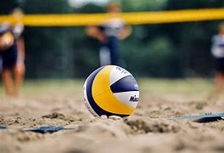

In [ ]:
from PIL import Image
img = Image.open(f'test_images/Volleyball.jpeg')
img.thumbnail((224,224))
img

In [ ]:
recognize_image(img)

{'Baseball': 4.697410904697108e-09,
 'Basketball': 5.386587176303692e-08,
 'Billiards': 3.327437752886908e-06,
 'Bowling': 2.5379764956312556e-09,
 'Cricket': 6.377524064404838e-10,
 'Football': 3.149125760160132e-08,
 'Golf': 5.133732550177683e-09,
 'Rugby': 6.246447810553946e-06,
 'Tennis': 1.7163204191206205e-10,
 'Volleyball': 0.9999904632568359}

In [ ]:
image = gr.Image()
label = gr.Label()
example = [
    'test_images/Football.jpeg',
    'test_images/Rugby.jpeg',
    'test_images/Volleyball.jpeg',
]

In [ ]:
iface = gr.Interface(fn = recognize_image, inputs = image, outputs = label, examples = example)
iface.launch(inline=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7648144449855d504f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
